<a href="https://colab.research.google.com/github/95871abhinandankumar/95871abhinandankumar/blob/main/ML_aasignment_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn import datasets
import pandas as pd


boston = datasets.load_boston(return_X_y=False)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

In [3]:
train_dataset = boston_df.sample(frac=0.3)
dataframe = boston_df.drop(train_dataset.index)
validation_dataset = dataframe.sample(frac=(.1/.7))
test_dataset = dataframe.drop(validation_dataset.index)

print("train dataset\n", train_dataset)
# print("validation dataset\n", validation_dataset)
# print("test dataset\n", test_dataset)


train dataset
          CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
177   0.05425   0.0   4.05   0.0  0.510  ...  296.0     16.6  395.60   6.29   24.6
361   3.83684   0.0  18.10   0.0  0.770  ...  666.0     20.2  350.65  14.19   19.9
21    0.85204   0.0   8.14   0.0  0.538  ...  307.0     21.0  392.53  13.83   19.6
366   3.69695   0.0  18.10   0.0  0.718  ...  666.0     20.2  316.03  14.00   21.9
0     0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
..        ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
379  17.86670   0.0  18.10   0.0  0.671  ...  666.0     20.2  393.74  21.78   10.2
50    0.08873  21.0   5.64   0.0  0.439  ...  243.0     16.8  395.56  13.45   19.7
141   1.62864   0.0  21.89   0.0  0.624  ...  437.0     21.2  396.90  34.41   14.4
118   0.13058   0.0  10.01   0.0  0.547  ...  432.0     17.8  338.63  15.37   20.4
246   0.33983  22.0   5.86   0.0  0.431  ...  330.0     19.1  390.18   9

In [5]:
import numpy as np

In [6]:
def hypothesis(w, index, dataset):
  sample =dataset[index][:-1]
  sample = np.concatenate([[1], sample])
  array = np.multiply(w, sample)
  return np.sum(array)


w=[1,1,1]
dataset = np.array([[1,2,6], [2,10,24]])

print(hypothesis(w, 0, dataset))
print(dataset)

4
[[ 1  2  6]
 [ 2 10 24]]


In [7]:
# to calculate the predicted value with the help of hypothesis function
def predicted_values(w, dataset):
  predicted = []
  for i in range(len(dataset)):
    predicted.append(hypothesis(w, i, dataset))
  
  return np.array(predicted)

predicted = predicted_values(w, dataset)

print(predicted)


# to calculate mean square error
def MSE(predicted, actual):
  return np.square(np.subtract(predicted, actual)).mean()/2

MSE(predicted, dataset[:,-1])

[ 4 13]


31.25

In [8]:
# to update w using batch gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w


#w=update_parameter(w, 0.1, dataset)
print(update_parameter(w, 0.1, dataset))


[1.65, 2.2, 6.7]


In [ ]:
# to update w using stochastic gradient decendent
def update_parameter(w, alpha, dataset):
  predicted = predicted_values(w, dataset)
  m = len(dataset)
  w[0] = w[0] - (alpha /m)*(np.sum(np.subtract(predicted, dataset[:, -1])))
  for i in range(1, len(w)):
    w[i] = w[i] - (alpha /m)*(np.sum(np.multiply(np.subtract(predicted, dataset[:, -1]), dataset[:, i-1])))
  return w


In [9]:
def linear_regression(epoch, alpha, rho, w, train_dataset):
  epochs_MSE=[]
  pre_MSE = 0
  curr_MSE = 0
  for itr in range(epoch):
    predicted = predicted_values(w, train_dataset)
    curr_MSE = MSE(predicted, train_dataset[:,-1])
    w = update_parameter(w, alpha, train_dataset)

    epochs_MSE.append(curr_MSE)

    if abs(curr_MSE - pre_MSE) <= rho:
      break;
  return w, epochs_MSE


In [18]:
from sklearn import preprocessing
w=[1 for _ in range(14)]

normalized = preprocessing.normalize(train_dataset.to_numpy())
w1, trains_MSE1 = linear_regression(10, 0.1, 0.5, w, normalized)


validation = preprocessing.normalize(validation_dataset.to_numpy())
predicted = predicted_values(w1, validation)
val_MSE1 = MSE(predicted, validation[:,-1])

# print(w1)
# print(trains_MSE1)
print("MSE of validation set")
print(val_MSE1)



w=[1 for _ in range(14)]
w2, trains_MSE2 = linear_regression(20, 0.01, 0.6, w, normalized)

predicted = predicted_values(w2, validation)
val_MSE2 = MSE(predicted, validation[:,-1])

# print(w2)
# print(trains_MSE2)
print("MSE of validation set")
print(val_MSE2)



w=[1 for _ in range(14)]
w3, trains_MSE3 = linear_regression(30, 0.02, 0.7, w, normalized)

predicted = predicted_values(w3, validation)
val_MSE3 = MSE(predicted, validation[:,-1])

# print(w3)
# print(trains_MSE3)
print("MSE of validation set")
print(val_MSE3)


w=[1 for _ in range(14)]
w4, trains_MSE4 = linear_regression(40, 0.03, 0.8, w, normalized)

predicted = predicted_values(w4, validation)
val_MSE4 = MSE(predicted, validation[:,-1])

# print(w4)
# print(trains_MSE4)
print("MSE of validation set")
print(val_MSE4)

w=[1 for _ in range(14)]
w5, trains_MSE5 = linear_regression(50, 0.001, 0.9, w, normalized)

predicted = predicted_values(w5, validation)
val_MSE5 = MSE(predicted, validation[:,-1])

# print(w5)
# print(trains_MSE5)
print("MSE of validation set")
print(val_MSE5)

MSE of validation set
0.2582199179039669
MSE of validation set
1.5333231331266093
MSE of validation set
0.6428743529869899
MSE of validation set
0.7119186417371705
MSE of validation set
2.749394689398599


In [17]:
print("All MSE considering the best hyperparameter")
print("Validation MSE :", val_MSE1)


train = preprocessing.normalize(train_dataset.to_numpy())
predicted = predicted_values(w1, train)
best_trainMSE = MSE(predicted, train[:,-1])

print("Train MSE:", best_trainMSE)

test = preprocessing.normalize(test_dataset.to_numpy())
predicted = predicted_values(w1, test)
best_testMSE = MSE(predicted, test[:,-1])

print("TEST MSE:", best_testMSE)

All MSE considering the best hyperparameter
Validation MSE : 0.2582199179039669
Train MSE: 0.2538139141398415
TEST MSE: 0.25191667848146443


[3.285532732715918, 2.1429686039781846, 1.3978894214835558, 0.9120146878292289, 0.5951701198918857, 0.3885520433309116]


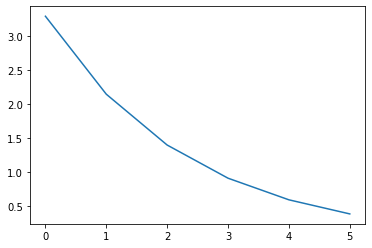

In [20]:
import matplotlib.pyplot as plt

# print(trains_MSE1)
epoch = [i for i in range(len(trains_MSE1))]
plt.plot(epoch, trains_MSE1)